Import the required libraries

In [285]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import  metrics

Read the csv files

In [286]:
total =  pd.read_csv("email_table.csv")
opened = pd.read_csv("email_opened_table.csv")
clicked =  pd.read_csv("link_clicked_table.csv")

In [287]:
total.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


Since this is a classification problem, we need to create a new column for identifying the email ids that have opened the email as well as clicked the email link

In [288]:
opened["open"] = 1
clicked["clicked"] = 1

We now merge the files into a single dataframe for convineance

In [289]:
result_1 =  pd.merge(total, opened, how="left", on=["email_id"])

In [290]:
result_1.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open
0,85120,short_email,personalized,2,Sunday,US,5,NaN
1,966622,long_email,personalized,12,Sunday,UK,2,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,NaN
3,493711,short_email,generic,6,Monday,UK,1,NaN
4,106887,long_email,generic,14,Monday,US,6,NaN


We will replace the Nan values with 0 which signifies the emails that have not been opened. Now we will repeat the process with emails with clicked links

In [291]:
result_1["open"].fillna(0, inplace=True)

In [292]:
result_1.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open
0,85120,short_email,personalized,2,Sunday,US,5,0.0
1,966622,long_email,personalized,12,Sunday,UK,2,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,0.0
3,493711,short_email,generic,6,Monday,UK,1,0.0
4,106887,long_email,generic,14,Monday,US,6,0.0


In [293]:
data =   pd.merge(result_1, clicked, how="left", on=["email_id"])

In [294]:
result.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,clicked
0,85120,short_email,personalized,2,Sunday,US,5,0.0,0.0
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,0.0,0.0
3,493711,short_email,generic,6,Monday,UK,1,0.0,0.0
4,106887,long_email,generic,14,Monday,US,6,0.0,0.0


In [295]:
data["clicked"].fillna(0, inplace=True)

We check the distribution of the emails that have been opened and the percent of emails that have been clicked

In [296]:
data["open"].value_counts(normalize=True)

open
0.0    0.89655
1.0    0.10345
Name: proportion, dtype: float64

In [297]:
data["clicked"].value_counts(normalize=True)

clicked
0.0    0.97881
1.0    0.02119
Name: proportion, dtype: float64

The pie chart gives a better understanding of the emails that have been opened and the percent of emails which have the links clicked

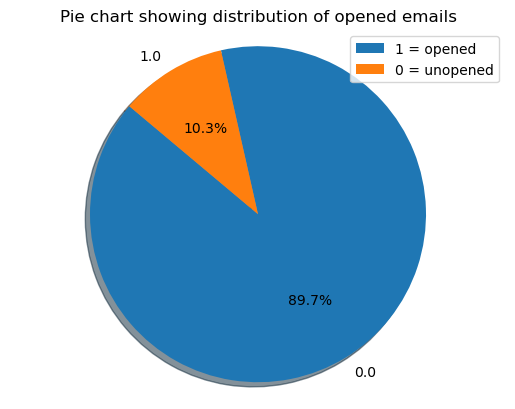

In [298]:
sizes = data["open"].value_counts()
# Plot
plt.pie(sizes.values, labels=sizes.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Pie chart showing distribution of opened emails")
plt.axis('equal')
plt.legend(["1 = opened","0 = unopened"])
plt.show()

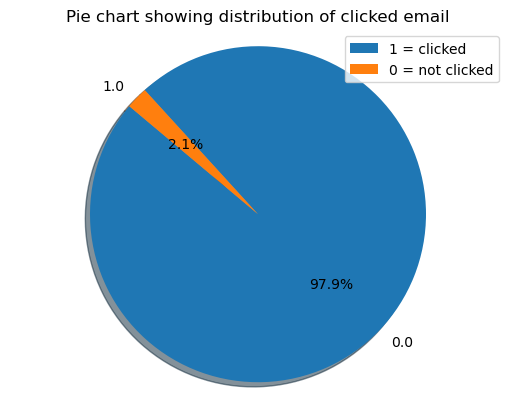

In [299]:
sizes = data["clicked"].value_counts()
# Plot
plt.pie(sizes.values, labels=sizes.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Pie chart showing distribution of clicked email")
plt.axis('equal')
plt.legend(["1 = clicked","0 = not clicked"])
plt.show()

Now we look at the percent of the emails that have the link clicked amongst the emails that have been opened

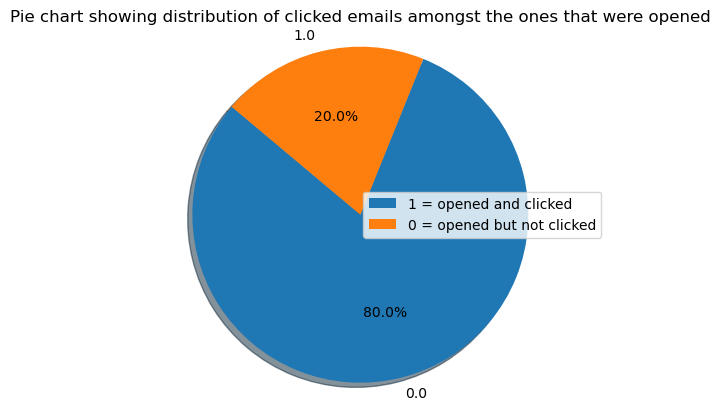

In [300]:
data_1 = data[data["open"]==1]
sizes =  data_1["clicked"].value_counts()
# Plot
plt.pie(sizes.values, labels=sizes.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Pie chart showing distribution of clicked emails amongst the ones that were opened")
plt.axis('equal')
plt.legend(["1 = opened and clicked","0 = opened but not clicked"])
plt.show()

#### Query 1 :What percentage of users opened the email and what percentage clicked on the link within the email?


10.4 percent of the total emails sent out have been opened
2.1 percent of the total emails sent out have been clicked

This implies that about 20 percent of the emails that have been opened have their links clicked

In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   email_id             100000 non-null  int64  
 1   email_text           100000 non-null  object 
 2   email_version        100000 non-null  object 
 3   hour                 100000 non-null  int64  
 4   weekday              100000 non-null  object 
 5   user_country         100000 non-null  object 
 6   user_past_purchases  100000 non-null  int64  
 7   open                 100000 non-null  float64
 8   clicked              100000 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ MB


Now an important aspect that we must look into is the credibility of the data. The emails  that have been clicked but not opened have no sense as the emails have to be opened before the links are clicked. Therefore we will remove these faulty entries

In [302]:
data_2 = data[data['clicked']==1]

In [303]:
data_2[data_2['open']==0].shape

(50, 9)

In [304]:
data[data['clicked']==1][data[data['clicked']==1]['open']==0].index

Index([ 3156,  3527,  5724,  7202, 10660, 11255, 13104, 15537, 16440, 17535,
       20008, 21283, 25464, 28881, 29165, 32770, 37313, 39785, 42829, 44485,
       47833, 48464, 53180, 53991, 55883, 56454, 58509, 58822, 60817, 65559,
       69042, 69405, 70878, 71271, 71779, 72770, 73523, 76795, 79191, 83417,
       83454, 87481, 87500, 88677, 90662, 92703, 94073, 94333, 95005, 95167],
      dtype='int64')

In [305]:
data.drop(index= (i for i in (data[data['clicked']==1][data[data['clicked']==1]['open']==0].index)), inplace=True)

In [306]:
data[data['clicked']==1][data[data['clicked']==1]['open']==0].index

Index([], dtype='int64')

In [307]:
data[data['clicked']==1]['open'].value_counts()

open
1.0    2069
Name: count, dtype: int64

In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99950 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   email_id             99950 non-null  int64  
 1   email_text           99950 non-null  object 
 2   email_version        99950 non-null  object 
 3   hour                 99950 non-null  int64  
 4   weekday              99950 non-null  object 
 5   user_country         99950 non-null  object 
 6   user_past_purchases  99950 non-null  int64  
 7   open                 99950 non-null  float64
 8   clicked              99950 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 7.6+ MB


We look at the countries of the residents and notice the response rate or the click through rate to understand how people from different countries behave to the emails 

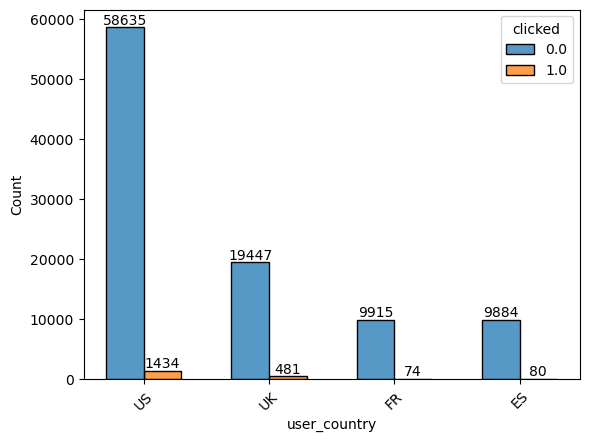

In [309]:
plt.figure()
ax =  sns.histplot(data=data, x = 'user_country', hue='clicked', multiple='dodge', shrink=0.6)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.show()

We will also look at the amount of clicked emails based on the day that they were sent out to understand the response based on the weekday

In [223]:
data[data['clicked']==1].groupby(by='user_country')[['clicked']].agg(['count'])

,clicked
,count
user_country,
ES,80
FR,74
UK,481
US,1434


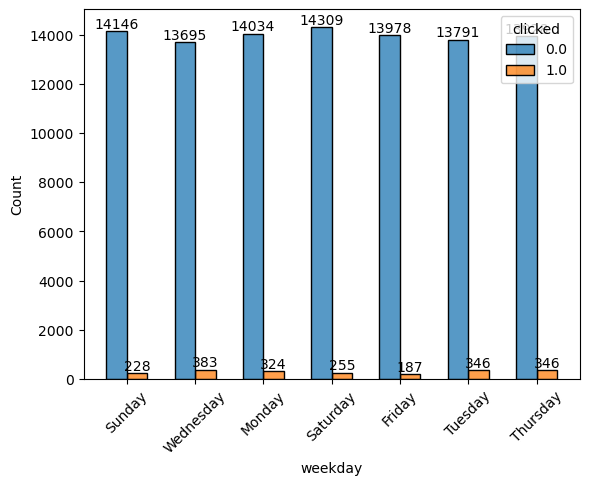

In [311]:
plt.figure()
ax =  sns.histplot(data=data, x = 'weekday', hue='clicked', multiple='dodge', shrink=0.6)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.show()

In [313]:
data[data['clicked']==1].groupby(by='weekday')[['clicked']].agg(['count'])

,clicked
,count
weekday,
Friday,187
Monday,324
Saturday,255
Sunday,228
Thursday,346
Tuesday,346
Wednesday,383


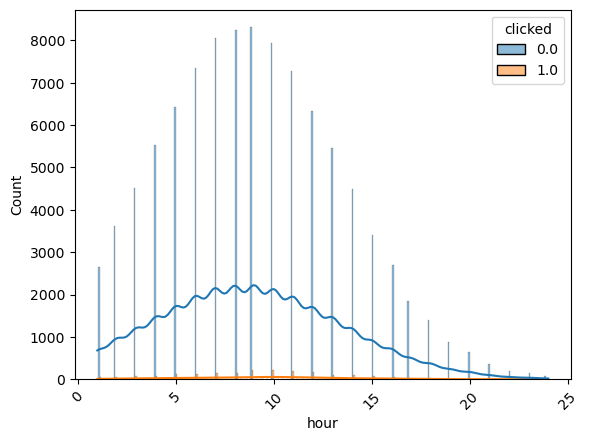

In [312]:
plt.figure()
sns.histplot(data=data, x = 'hour', hue='clicked', multiple='dodge', shrink=0.6,kde=True)
plt.xticks(rotation=45)
plt.show()

      clicked  not clicked   percent
hour                                
1          47         2654  0.017709
2          58         3616  0.016040
3          89         4520  0.019690
4          89         5531  0.016091
5         115         6433  0.017877
6         124         7337  0.016901
7         146         8054  0.018128
8         158         8239  0.019177
9         215         8309  0.025876
10        226         7949  0.028431
11        197         7280  0.027060
12        165         6341  0.026021
13        109         5470  0.019927
14         90         4485  0.020067
15         85         3406  0.024956
16         61         2695  0.022635
17         35         1858  0.018837
18         23         1398  0.016452
19         15          890  0.016854
20          8          648  0.012346
21          3          362  0.008287
22          3          200  0.015000
23          6          139  0.043165
24          2           67  0.029851


<Axes: xlabel='hour'>

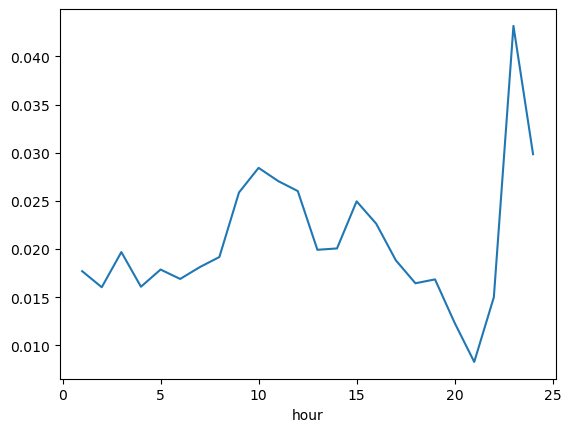

In [336]:
df1 =  pd.DataFrame(data[data['clicked']==1].groupby(by='hour')[['clicked']].agg(['count']))
df2 =  pd.DataFrame(data[data['clicked']==0].groupby(by='hour')[['clicked']].agg(['count']))

df3 =  pd.merge(df1, df2, how="left", on=["hour"])
df3.columns = df3.columns.droplevel(1)
df3.columns = ["clicked", "not clicked"]
df3["percent"] = df3["clicked"]/df3["not clicked"]
print(df3)
df3["percent"].plot()

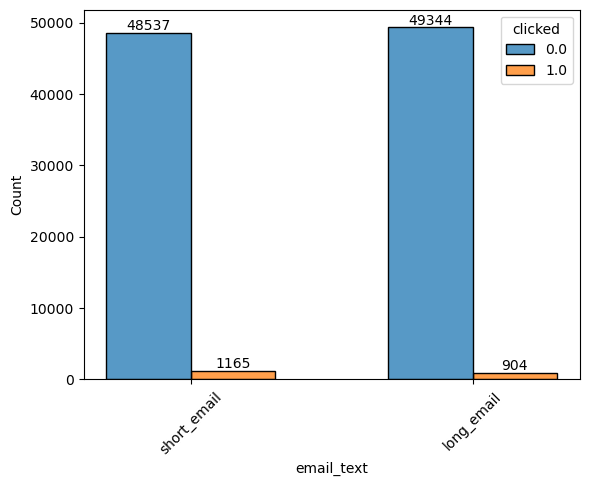

In [183]:
plt.figure()
ax =  sns.histplot(data=data, x = 'email_text', hue='clicked', multiple='dodge', shrink=0.6)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.show()

In [314]:
data[data['clicked']==1].groupby(by='email_text')[['clicked']].agg(['count'])

,clicked
,count
email_text,
long_email,904
short_email,1165


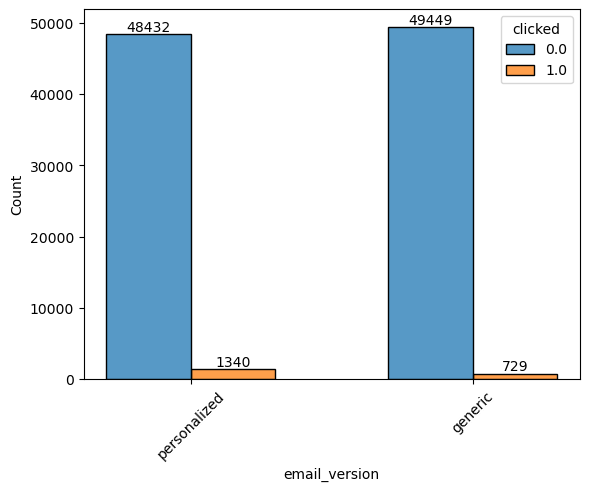

In [184]:
plt.figure()
ax =  sns.histplot(data=data, x = 'email_version', hue='clicked', multiple='dodge', shrink=0.6)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.show()

In [207]:
data[data['clicked']==1].groupby(by='email_version')[['clicked']].agg(['count'])

,clicked
,count
email_version,
generic,729
personalized,1340


In [214]:
data.columns

Index(['email_id', 'email_text', 'email_version', 'hour', 'weekday',
       'user_country', 'user_past_purchases', 'open', 'clicked'],
      dtype='object')

In [215]:
column_list_plot = ['email_text','email_version','hour','weekday','user_country','user_past_purchases']

In [216]:
for col in column_list_plot:
    print(data[data['clicked']==1].groupby(by=col)[['clicked']].agg(['count']))
    print('*'*100)

            clicked
              count
email_text         
long_email      904
short_email    1165
****************************************************************************************************
              clicked
                count
email_version        
generic           729
personalized     1340
****************************************************************************************************
     clicked
       count
hour        
1         47
2         58
3         89
4         89
5        115
6        124
7        146
8        158
9        215
10       226
11       197
12       165
13       109
14        90
15        85
16        61
17        35
18        23
19        15
20         8
21         3
22         3
23         6
24         2
****************************************************************************************************
          clicked
            count
weekday          
Friday        187
Monday        324
Saturday      255
Sunday        228
Thursday  

We will encode the categoical variables into numerical values. We can change the days of the week first by using a dict and then change the others using the label encoder from sklearn

In [337]:
days = {'Sunday':0, 'Monday':1, 'Tuesday':2 ,'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6}
data['weekday'] = data['weekday'].replace(days)

In [338]:
le = LabelEncoder()
data['email_text'] =  le.fit_transform(data['email_text'])
data['email_version'] =  le.fit_transform(data['email_version'])
data['user_country'] = le.fit_transform(data['user_country'])

In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99950 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   email_id             99950 non-null  int64  
 1   email_text           99950 non-null  int32  
 2   email_version        99950 non-null  int32  
 3   hour                 99950 non-null  int64  
 4   weekday              99950 non-null  int64  
 5   user_country         99950 non-null  int32  
 6   user_past_purchases  99950 non-null  int64  
 7   open                 99950 non-null  float64
 8   clicked              99950 non-null  float64
dtypes: float64(2), int32(3), int64(4)
memory usage: 6.5 MB


As can be seen, the data has been converted from categorical to numerical values. Now we create the independent variables required and the target variable. Since our concern is the no of emails which have the links clicked, we make that column our target variable. The emailid is of no use to us and therefore we will drop the same as well as the opened column

In [241]:
X = data.drop(columns=['email_id','open', 'clicked'])
y = data['clicked']

In [255]:
model =  LogisticRegression()
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.35, random_state=0, stratify=y)

### Query 2 : The VP of marketing thinks that it is stupid to send emails in a random way. Based on all the information you have about the emails that were sent, can you build a model to optimize in future how to send emails to maximize the probability of users clicking on the link inside the email?

In [256]:
model.fit(X_train,y_train)

LogisticRegression()

In [257]:
y_pred =  model.predict(X_test)

In [258]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     34259
         1.0       0.00      0.00      0.00       724

    accuracy                           0.98     34983
   macro avg       0.49      0.50      0.49     34983
weighted avg       0.96      0.98      0.97     34983



In [259]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before', counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({0.0: 63622, 1.0: 1345})
After Counter({0.0: 63622, 1.0: 63622})


In [260]:
model.fit(X_train_sm,y_train_sm)

LogisticRegression()

In [261]:
y_pred =  model.predict(X_test)

In [262]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.67      0.80     34259
         1.0       0.04      0.59      0.07       724

    accuracy                           0.67     34983
   macro avg       0.51      0.63      0.44     34983
weighted avg       0.97      0.67      0.79     34983



<Axes: >

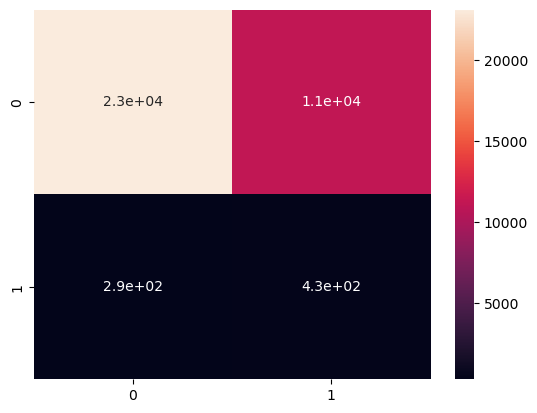

In [263]:
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

The  model predicts that there is a prediction rate of 0.59 for the emails that have been clicked and 0.67 for the emails that have been not clicked. Therefore it is possible to create a model which will successfully predict about 60 percent of the emails that will be opened.

<Axes: ylabel='Feature'>

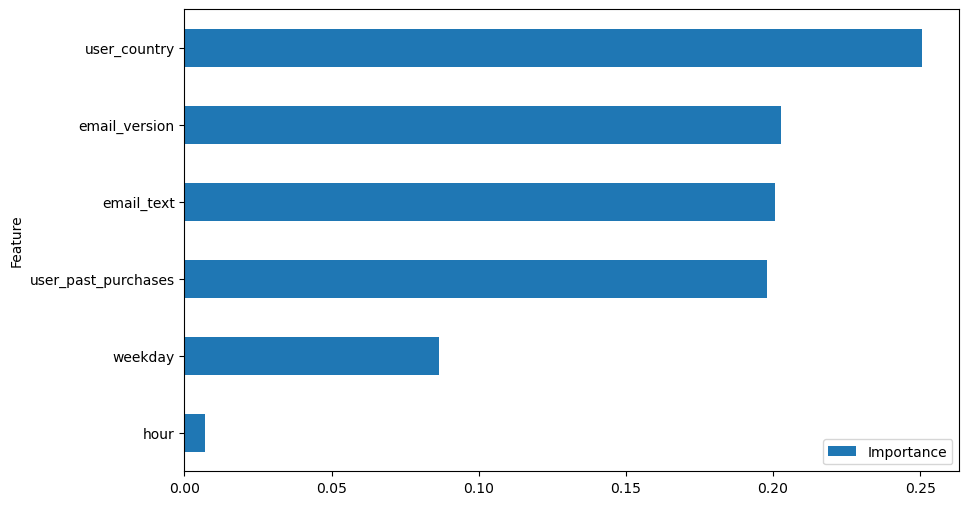

In [266]:
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

The fearture importance is shown above where it is evident that the user country, email version, email text and past purchases are the important factors in deciding the click through rate

<Axes: >

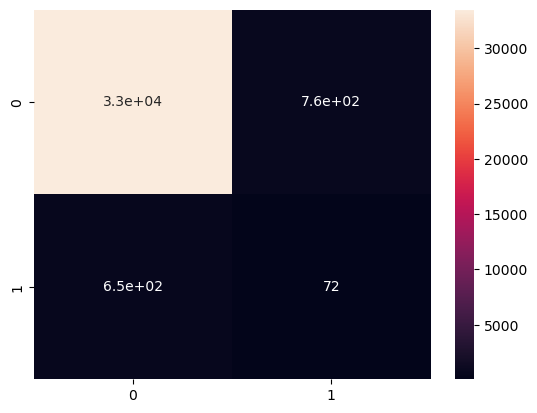

In [273]:
y_pred_prob =  model.predict_proba(X_test)
y_pred_p =  (y_pred_prob[:,1] >= 0.8).astype(int)
cm = metrics.confusion_matrix(y_test, y_pred_p)
sns.heatmap(cm, annot=True)

### Query 3: By how much do you think your model would improve click through rate (defined as # of users who click on the link/total users who receive the email). How would you test that?
The click through rate is approximately 2 percent of all the emails sent. We can improve the click through rate to approximately 55 percent based on the model recall rate which perdicts the percentage of true outcomes in proportion to the total number of true outcomes. We can test this by conducting a A/B test by creating two sets of emails that will show the increase or decrease in the click through rate.


If you are interested in reducing false negatives, them we can adjust the thresoldand in the aboe case, we have adjusted to show that the recal, for not clicked is very high. The trick is to understand which is the type of email which has to be optimized. If we are interested in understanding the number of people who are more probable to click the link then we can reduce the threshold value

In [274]:
print(metrics.classification_report(y_test,y_pred_p))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     34259
         1.0       0.09      0.10      0.09       724

    accuracy                           0.96     34983
   macro avg       0.53      0.54      0.54     34983
weighted avg       0.96      0.96      0.96     34983



#### Query 4: Did you find any interesting pattern on how the email campaign performed for different segments of users? Explain.


1. The email has a better response rate when it is personalized mail as opposed to the generic mail. 
2. The email has a better click through rate when it is sent to people from the US.
3. The email has a better click through rate when sent on Monday,Tuesday, Wednesday or Thursday
4. Also the emails that have been sent during the morning hours have a better click through rate